# 1. Color Selection
First, we well need to apply a color filter to our image to retain just the necessary information
The following code will import the libraries (A), read the image(B) and print the general data of image (C)
## Reading the image

In [61]:
## (A)
##Library to make plot printings
import matplotlib.pyplot as plt
##Library to read image
import matplotlib.image as mpimg
## Library to make mathematical operations like in matlab
import numpy as np

## (B)
##Reading the image
image = mpimg.imread('test.jpg')

## (C)
##Printing the image general data - type of file and dimensions
##The result of type(image) will be numpy.ndarray
## which mean a multidimensional array
##The result of image.shape will be:
## YYPixels,XXPixels,ColorLayer
print "Image General Data"
print 'This image is: ', type(image), 'with dimensions : ', image.shape

Image General Data
This image is:  <type 'numpy.ndarray'> with dimensions :  (540L, 960L, 3L)


## Understanding image axis

Now we will extract we will extract the size of the image. Make sure you are taking the correct data. Because image.shape[0] is in the y direction and image.shape[1] is in the x direction, but which direction is is x and y ? The following image will explain it better.
<img style="width:20%;" src="https://www.computerhope.com/jargon/x/xaxis.jpg">

In [62]:
## Extracting x and y dimentions
ysize = image.shape[0]
xsize = image.shape[1]

## Applying color Threshold
We just want to keep the landlines using a color filter. We already know landlines are white, and the color white is the combination of full Red, Green and White which is equal an #FFFFFF color, but due to camera imperfections, climate, dust and other inexpected perturbancies we need to have an error tolerance, which in my case was 15, but you can use any other of your preference.

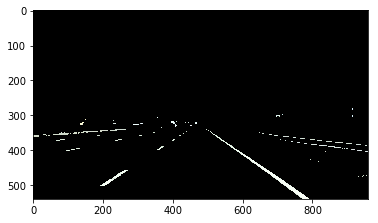

In [93]:
## Copying the image to another variable
color_select = np.copy(image)
## Defining my threshold
red_threshold = 200
green_threshold = 200
blue_threshold = 200
## Saving the threshold in an array
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

## Taking the positions of image which are below the threshold in the three color layers
## Note the "or" command
color_thresholds = (image[:,:,0]<rgb_threshold[0])\
        | (image[:,:,1]<rgb_threshold[1]) \
        | (image[:,:,2]<rgb_threshold[2])

## Making zero the parts below the threshold
color_select[color_thresholds] = [0,0,0]

## Showing the image
plt.imshow(color_select)
plt.show()

# 2. Region Selection

As you may have realized above, the road always appear in a triangular section of the image. So what we will do in this section will be darken all the rest of the image not contained inside this triangle.
<img style="width:30%;" src="https://cdn-images-1.medium.com/max/600/1*WFeDO4cV4H2Enqd01tDc-g.jpeg">


In [86]:
## First me make a copy of the image
region_select = np.copy(image)

## Second we define corners of the triangle containing the road
left_bottom = [xsize/8,ysize]
right_bottom = [7*xsize/8, ysize]
apex = [xsize/2, 11 * ysize/20]

## Then we define the lines of the triangle
## For Polyfit whe can give two points and the degree of aproximations
## polyfit(x, y, deg, rcond, full, w, cov)
## You will see that we obtaine a two element vector

fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

print fit_left
print fit_right
print fit_bottom


[  -0.675  621.   ]
[  0.675 -27.   ]
[  6.69906116e-17   5.40000000e+02]


Then we will need to create a grid containing all the positions of the image

In [87]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
## Realize that you obtain a 960 by 540 image
print XX
print YY


[[  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 ..., 
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]]
[[  0   0   0 ...,   0   0   0]
 [  1   1   1 ...,   1   1   1]
 [  2   2   2 ...,   2   2   2]
 ..., 
 [537 537 537 ..., 537 537 537]
 [538 538 538 ..., 538 538 538]
 [539 539 539 ..., 539 539 539]]


Now we will define our thresholds

In [88]:
##Defining thresholds
## Realize that we do not need fit_bottom
region_thresholds =  (YY < XX*fit_left[0] + fit_left[1]) | (YY < XX*fit_right[0] + fit_right[1])
print thresholds

[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


Finally we will turn black our threshold and display the image

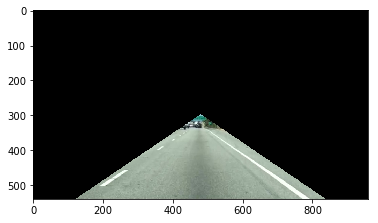

In [89]:
region_select[region_thresholds] = [0,0,0]

plt.imshow(region_select)
plt.show()

# 3. Color & Region Selection
In this code we will combination both of our thresholds to obtain better results

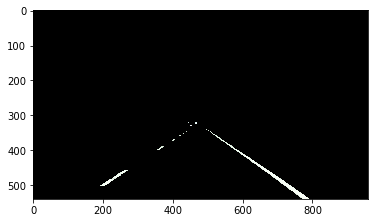

In [95]:
## Copying the image
mixed_select = np.copy(image)
## Applying both thresholds
mixed_select[color_thresholds | region_thresholds] = [0,0,0]
## Showing the image
plt.imshow(mixed_select)
plt.show()


# 4.  Making lines Red



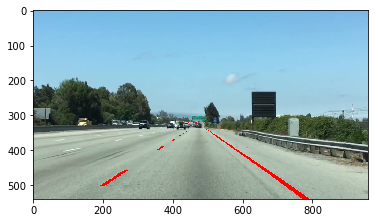

In [98]:
red_lines = np.copy(image)
red_lines[~color_thresholds & ~region_thresholds] = [255,0,0]

## Showing the image
plt.imshow(red_lines)
plt.show()